In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_file1 = "raw_data\\city_data.csv"
csv_file2 = "raw_data\\ride_data.csv"

city_df = pd.read_csv(csv_file1)
ride_df = pd.read_csv(csv_file2)
#reading in data files

In [3]:
data_df = pd.merge(ride_df,city_df, on='city', how='left')


In [4]:
data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
city_group = data_df.groupby(['city'])
city_group_df = pd.DataFrame(city_group.ride_id.count())
city_group_df['Average Fare']= city_group.fare.mean()

city_group_df.columns = ['Total Rides','Average Fare']
city_group_df = city_group_df[['Average Fare','Total Rides']]
city_group_df.head()


,Average Fare,Total Rides
city,,
Amandaburgh,24.641667,18
Barajasview,25.332273,22
Barronchester,36.422500,16
Bethanyland,32.956111,18
Bradshawfurt,40.064000,10


In [6]:
city_group_df = city_group_df.reset_index()

city_group_df.head()

,city,Average Fare,Total Rides
0,Amandaburgh,24.641667,18
1,Barajasview,25.332273,22
2,Barronchester,36.422500,16
3,Bethanyland,32.956111,18
4,Bradshawfurt,40.064000,10


In [7]:
city_group_df_merge = pd.merge(city_group_df,city_df, on='city', how='left')
city_group_df_merge.columns = ['City','Average Fare','Total Rides','Total Drivers','City Type']
#Created new dataframe with columns for bubble chart 

city_group_df_merge.head()
city_group_df_merge['City Type'].value_counts()
#used this for scaling the circle size in the bubble chart

Urban       66
Suburban    36
Rural       18
Name: City Type, dtype: int64

In [8]:
city_group_df_merge_urban = city_group_df_merge.loc[city_group_df_merge['City Type']=='Urban',:]
city_group_df_merge_suburban = city_group_df_merge.loc[city_group_df_merge['City Type']=='Suburban',:]
city_group_df_merge_rural = city_group_df_merge.loc[city_group_df_merge['City Type']=='Rural',:]
#created 3 separate dataframes for urban, suburban, and rural

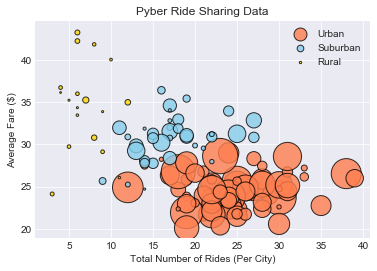

In [22]:
plt.scatter(city_group_df_merge_urban['Total Rides'],city_group_df_merge_urban['Average Fare'],c="coral",s=city_group_df_merge['Total Drivers']*(59602/66)/50 , edgecolors="black", alpha=.8)
plt.scatter(city_group_df_merge_suburban['Total Rides'],city_group_df_merge_suburban['Average Fare'],c="skyblue",s=city_group_df_merge['Total Drivers']*(8570/36)/50 , edgecolors="black", alpha=.8)
plt.scatter(city_group_df_merge_rural['Total Rides'],city_group_df_merge_rural['Average Fare'],c="gold",s=city_group_df_merge['Total Drivers']*(537/18)/50 , edgecolors="black", alpha=.8)
#scaled the circle size based on average driver count per city per city type

plt.title('Pyber Ride Sharing Data')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend(('Urban','Suburban','Rural'),loc='upper right',markerscale=.5)
plt.style.use('seaborn-deep')


In [10]:
city_type_group = data_df.groupby('type')
city_type_group_df = pd.DataFrame(city_type_group.ride_id.count())
city_type_group_df['Total Fares']=city_type_group.fare.sum()
city_type_group_df['Total Drivers']=city_type_group.driver_count.sum()
#Created dataframe for pie charts

city_type_group_df = city_type_group_df.reset_index()
city_type_group_df.columns = ['City Type','Total Rides','Total Fares', 'Total Drivers']
city_type_group_df.head()

,City Type,Total Rides,Total Fares,Total Drivers
0,Rural,125,4327.93,537
1,Suburban,625,19356.33,8570
2,Urban,1625,39854.38,59602


(-1.1505006413664867,
 1.1531626528111392,
 -1.1432189199005323,
 1.153724588258118)

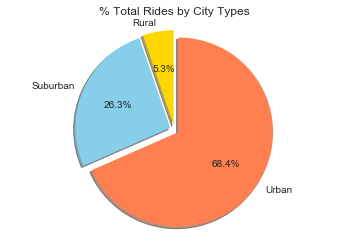

In [11]:
explode = (0.05,.05,0.05)
colors = ('gold','skyblue','coral')
plt.pie(city_type_group_df['Total Rides'], explode=explode, labels=city_type_group_df['City Type'], colors=colors, autopct="%1.1f%%", shadow=True,startangle=90)
plt.title("% Total Rides by City Types")
plt.axis('equal')

(-1.1674652263147534,
 1.1629839181986483,
 -1.1368171494075219,
 1.152939419680796)

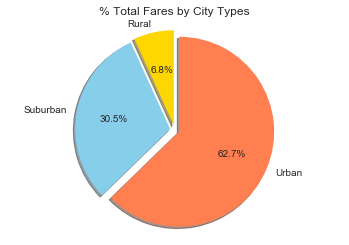

In [12]:
explode = (0.05,.05,0.05)
colors = ('gold','skyblue','coral')
plt.pie(city_type_group_df['Total Fares'], explode=explode, labels=city_type_group_df['City Type'], colors=colors, autopct="%1.1f%%", shadow=True,startangle=90)
plt.title("% Total Fares by City Types")
plt.axis('equal')

(-1.0649518065384507,
 1.1472761767677582,
 -1.2070599175193653,
 1.2098284189469708)

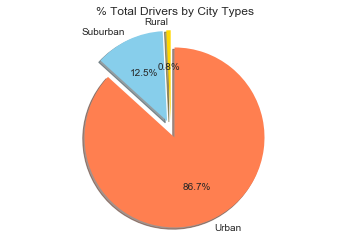

In [13]:
explode = (0.1,.1,0.1)
colors = ('gold','skyblue','coral')
plt.pie(city_type_group_df['Total Drivers'], explode=explode, labels=city_type_group_df['City Type'], colors=colors, autopct="%1.1f%%", shadow=True,startangle=90)
plt.title("% Total Drivers by City Types")
plt.axis('equal')

In [14]:
#Comments-Observable Trends
#The average fares are highest in rural then suburban then urban, which makes sense because the average distance per ride is most likely higher for rural rides. 
#At 86.7%, there are many more urban uber drivers, which makes sense because of the higher density of people in cities
#Suburban has about 1/3 the amount of rides as urban, but has about 1/2 the total fare amount as urban. 